In [1]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 40
t = 1
def Ef(N, L, t, tperp):
    return -2*t*(np.cos(2 * N * np.pi/L)) - tperp

def Ef1(N, L, t, tperp):
    return -2*t*(np.cos(2 * N * np.pi/L)) + tperp

def En(tperp):
    L = 40
    t = 1
    n = [0]
    for b in range(40):
        h = b + 1
        n.append(h)
        n.append(- h)
    all_energy = []
    for x in range(0, 40):
        N = n[x]
        all_energy.append(Ef1(N, L, t, tperp))
        all_energy.append(Ef(N, L, t, tperp))
    all_energy.sort()

    summ = 0
    s = []
    for i in range(len(all_energy)):
        summ = summ + all_energy[i]
        s.append(summ)

    energy2 = []
    for j in range(0, len(s) - 2, 2):
        energy2.append(s[j])
    return energy2


folder = ["t-1/", "t-0.5/", "t-0.2/"]
def En1(folder):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w2/" + folder
    for i in range(1, 80, 2):
        file_name = str(i) +"-1" + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

def pol(folder, n, tperp):
    m = []
    for i in range(0, len(n)):
         m.append(En1(folder)[i] - En(tperp)[i] - En(tperp)[0])
    return m

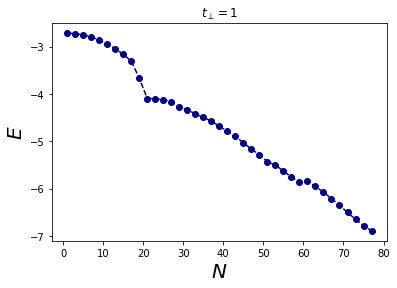

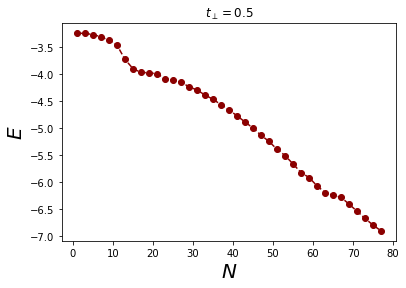

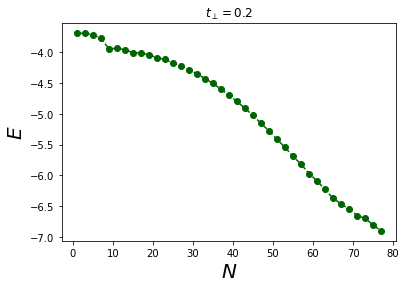

In [16]:
n = np.arange(1, 79, 2)
folder = ["t-1/", "t-0.5/", "t-0.2/"]
plt.xlabel('$N$', size=20)
plt.ylabel('$E$', size=20)
plt.plot(n, pol(folder[0], n, 1), 'o--', label='t=1', c='darkblue')
plt.title('$t_{\perp} = 1$')
plt.savefig('pol_tperp1.png')
plt.show()
plt.xlabel('$N$', size=20)
plt.ylabel('$E$', size=20)
plt.plot(n, pol(folder[1], n, 0.5), 'o--', label='t=0.5', c='darkred')
plt.title('$t_{\perp} = 0.5$')
plt.savefig('pol_tperp05.png')
plt.show()
plt.xlabel('$N$', size=20)
plt.ylabel('$E$', size=20)
plt.plot(n, pol(folder[2], n, 0.2), 'o--', label='t=0.2', c='darkgreen')
plt.title('$t_{\perp} = 0.2$')
plt.savefig('pol_tperp02.png')
plt.show()


In [10]:
En_N0 = [] # (3, 0)...(39, 0)
En_N1 = [] #
path = "C:/Users/Mindelly/Documents/GitHub/Diagrams/"
for i in range(1, 38):
    file_name = "point4." +str(i) + ".task1.out.xml"
    with open(path + file_name) as xml_file:
        data_dict = xmltodict.parse(xml_file.read())
    En_N0.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
for i in range(0, 37):
    file_name = "point5." +str(i) + ".task1.out.xml"
    with open(path + file_name) as xml_file:
        data_dict = xmltodict.parse(xml_file.read())
    En_N1.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))

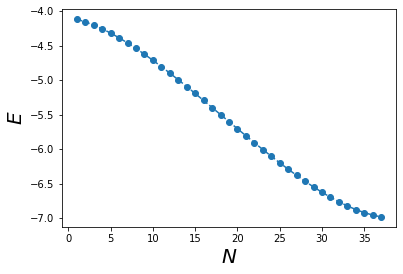

In [18]:
n = np.arange(1, 38)
m = []
for i in range(0, len(n)):
     m.append(En_N1[i] - En_N0[i] + 1.9941315938965789)
plt.plot(n, m, 'o--')
plt.xlabel('$N$', size=20)
plt.ylabel('$E$', size=20)
plt.savefig('pol_t1')
plt.show()